In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
from src.data_processing import process_file, compute_physical, process_file_from_wizard

folder_path = "data/Test_XH430W350_20240209/PWM_control/*.csv"

# List to store each processed dataframe
processed_dataframes = []

# Iterate over all CSV files in the folder
for file_path in glob.glob(folder_path):
    # Apply processing function to the dataframe
    processed_df = process_file_from_wizard(file_path)
    
    # Store the processed dataframe in the list
    processed_dataframes.append(processed_df)

external_inertia = 0.0022421143208 # Msolo
Ra = 9.3756 # [Ohm]
kt = 2.6657
ke = 0.8594

parameters = ke, kt, Ra, 0.080964165, 0.0665140867408596, 0.203719639, 0.04217117990939209, 0.0155818308
external_inertia = 0.0022421143208 # Msolo
for df in processed_dataframes:
    compute_physical(df, parameters, external_inertia)

/Users/simondeligne/Dionysos/thesis_model_dxl/src/data_processing.py:191: RuntimeWarning: invalid value encountered in divide
  df['Velocity_from_position'] = delta_x / delta_t
/Users/simondeligne/Dionysos/thesis_model_dxl/src/data_processing.py:197: RuntimeWarning: invalid value encountered in divide
  df['Acceleration_from_Velocity_from_position'] = delta_v / delta_t
/Users/simondeligne/Dionysos/thesis_model_dxl/src/data_processing.py:200: RuntimeWarning: invalid value encountered in divide
  df['Acceleration_from_Velocity_from_position_filtered'] = delta_v / delta_t
/Users/simondeligne/Dionysos/thesis_model_dxl/src/data_processing.py:203: RuntimeWarning: invalid value encountered in divide
  df['Acceleration_from_DXL_Velocity'] = delta_v / delta_t
/Users/simondeligne/Dionysos/thesis_model_dxl/src/data_processing.py:206: RuntimeWarning: invalid value encountered in divide
  df['Acceleration_from_DXL_Velocity_filtered'] = delta_v / delta_t
/Users/simondeligne/Dionysos/thesis_model_dxl

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


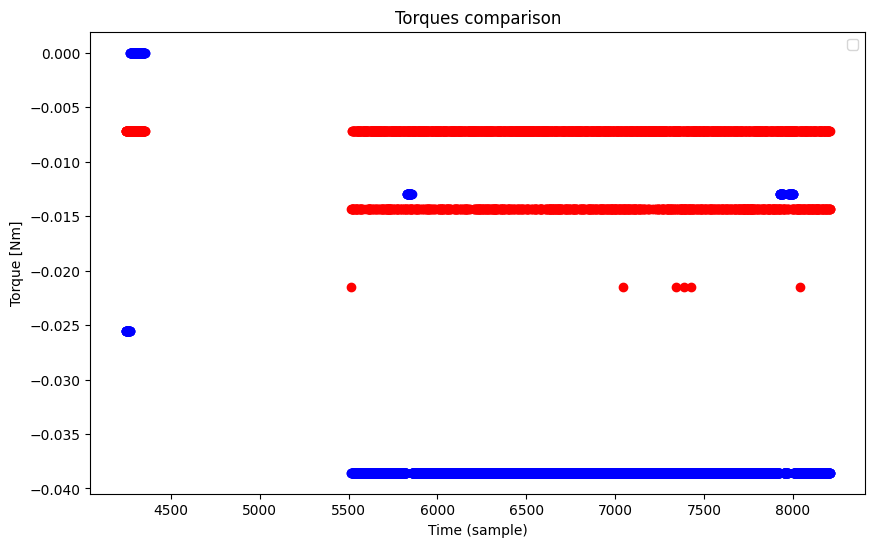

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


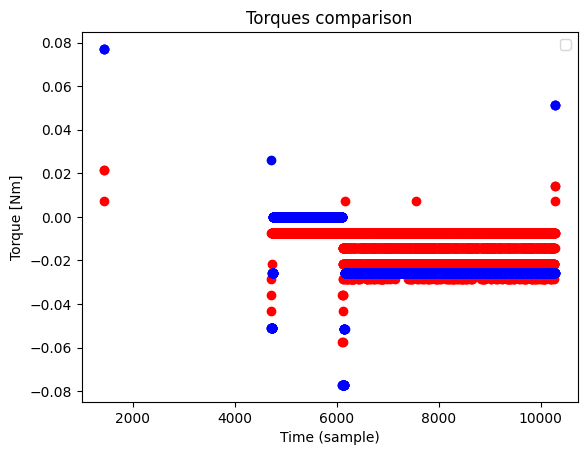

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


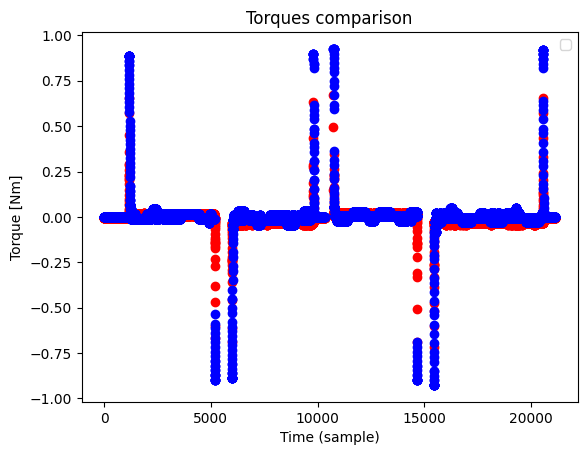

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


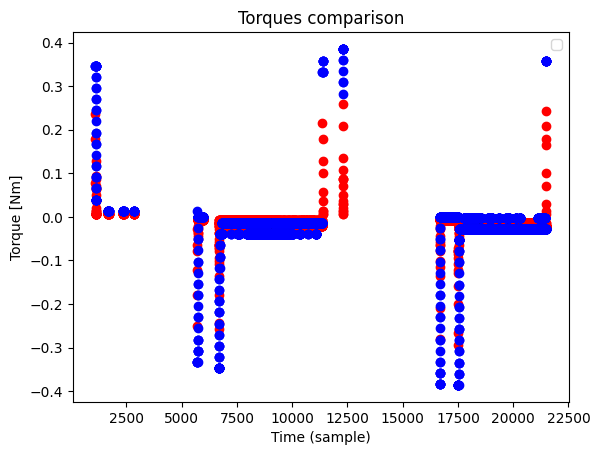

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


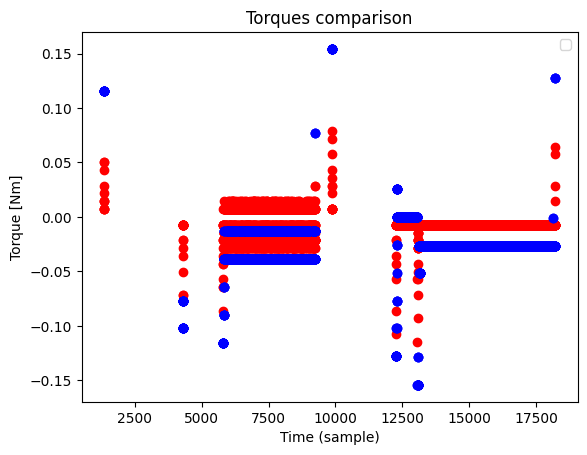

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


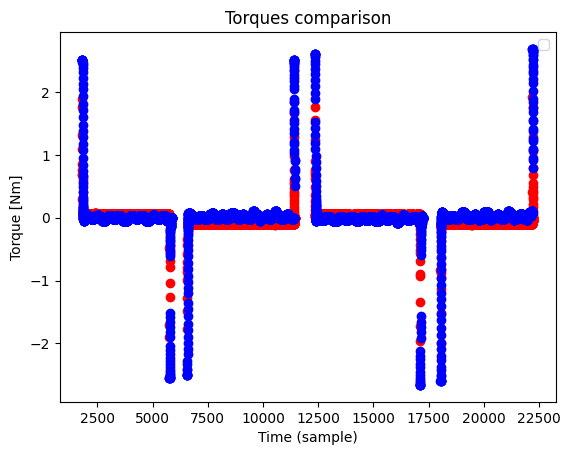

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


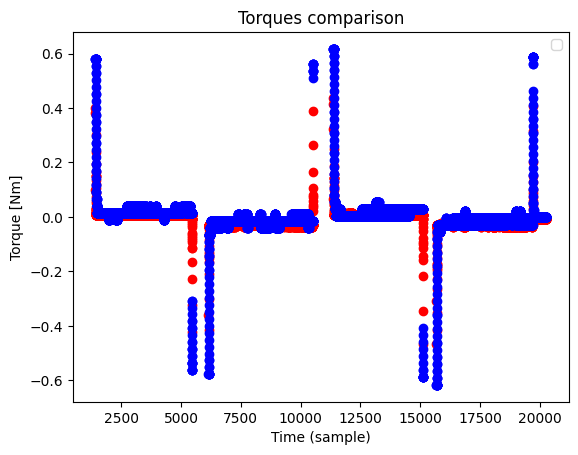

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


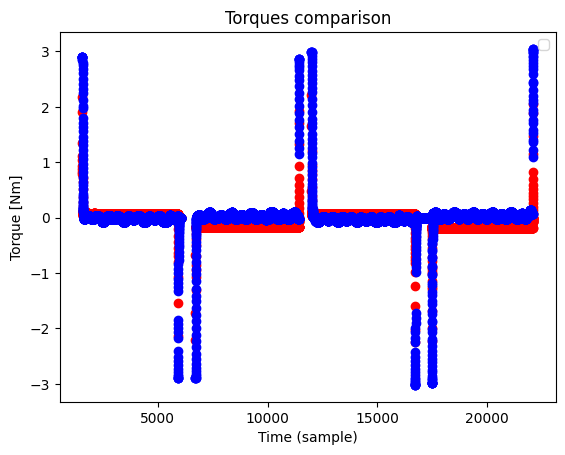

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


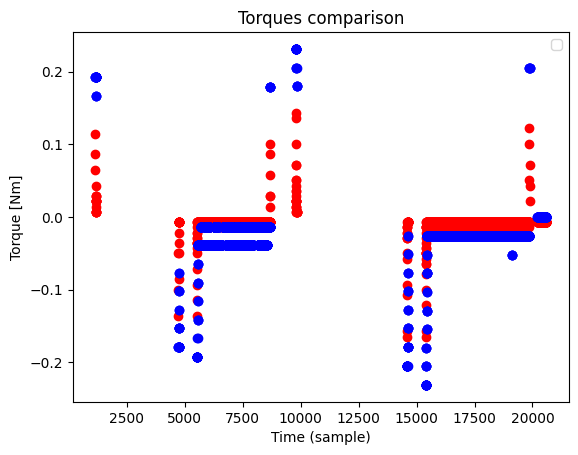

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


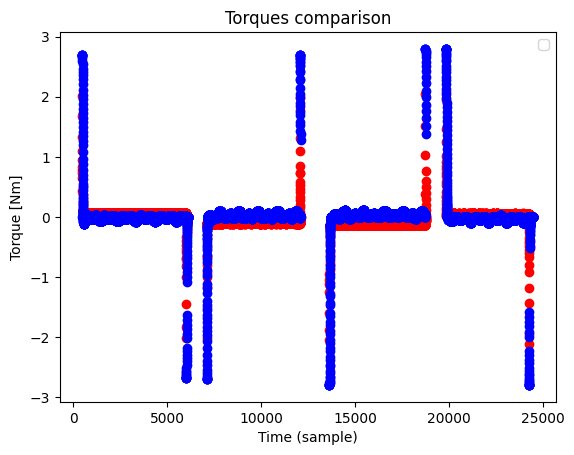

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


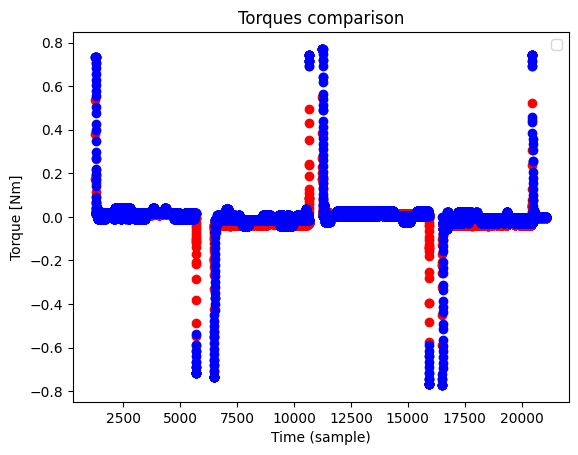

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


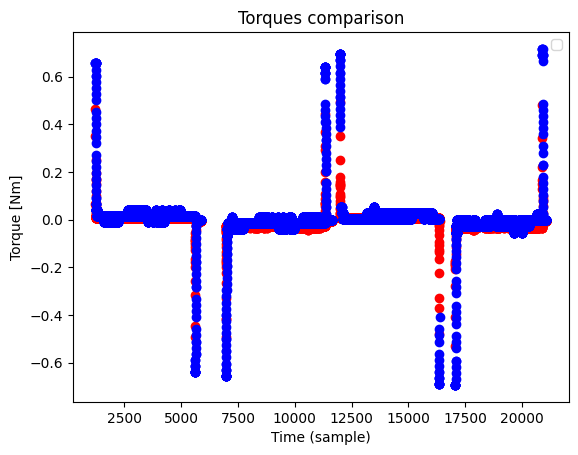

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


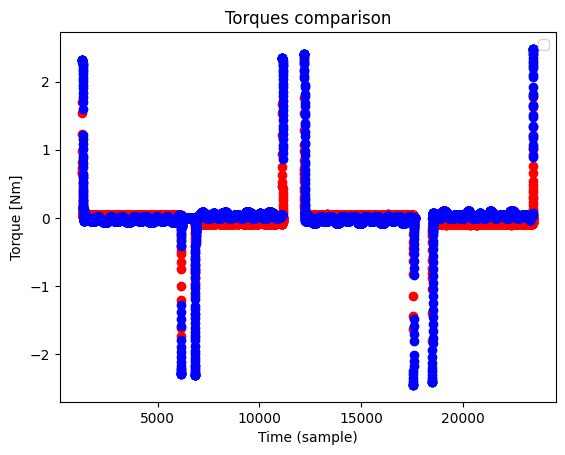

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


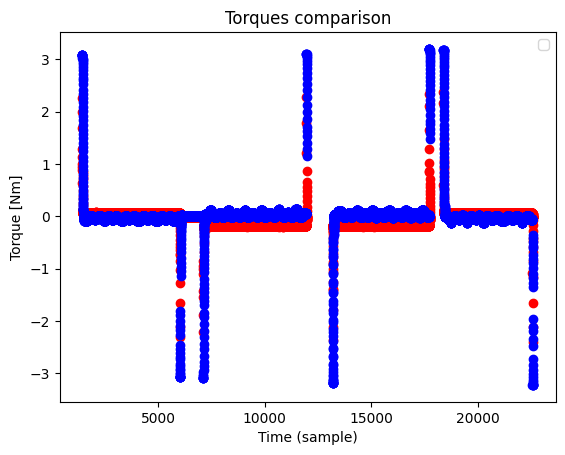

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


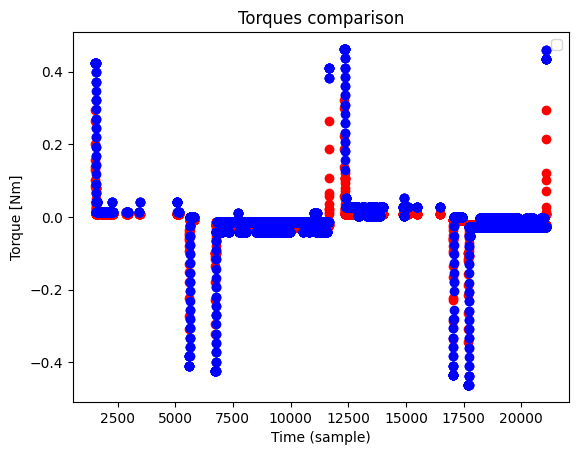

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


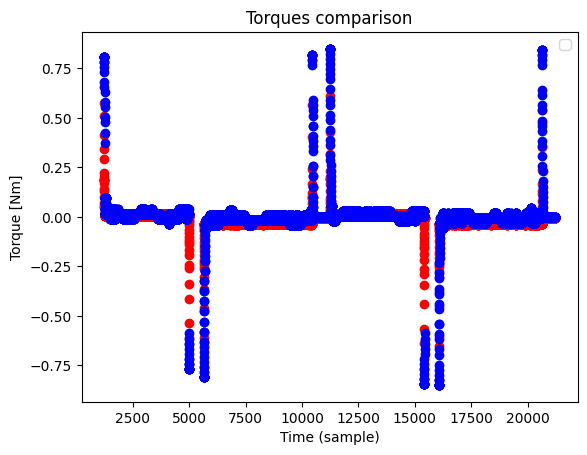

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


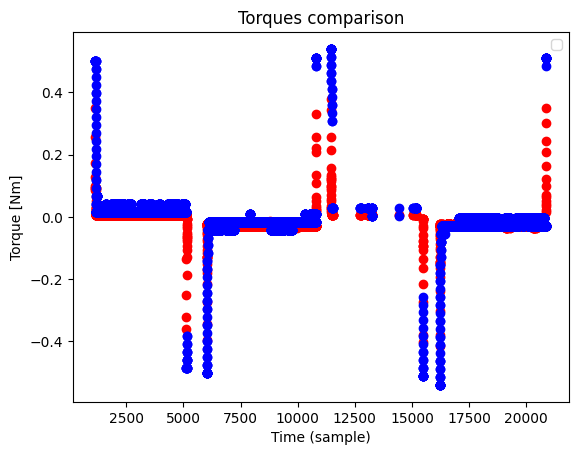

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


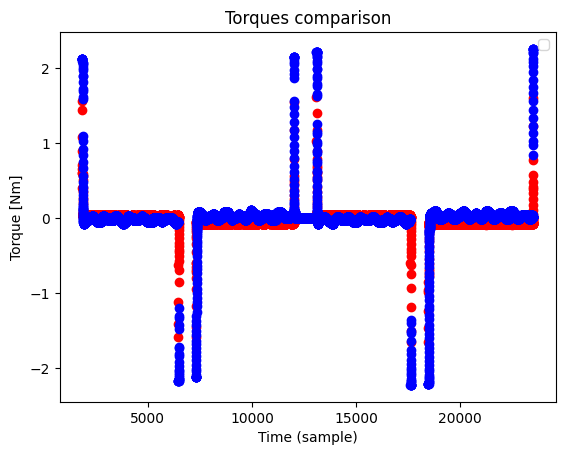

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


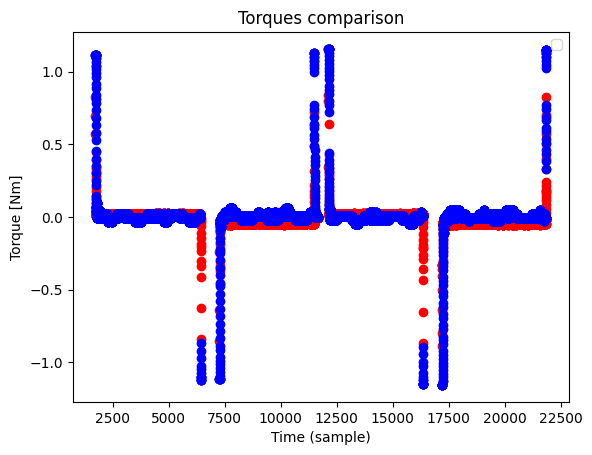

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


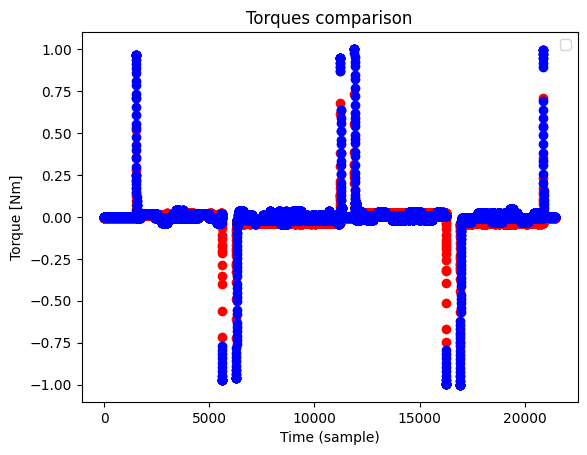

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


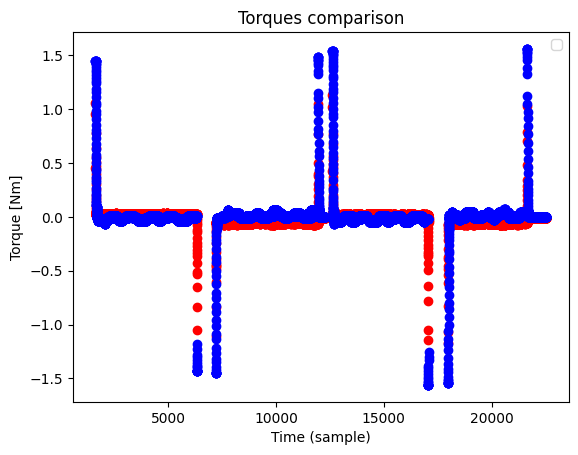

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


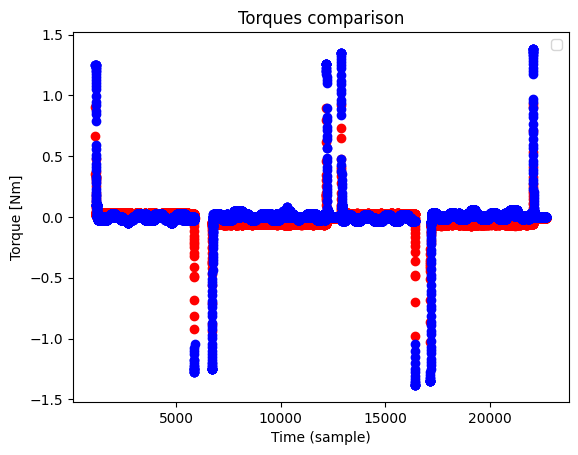

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


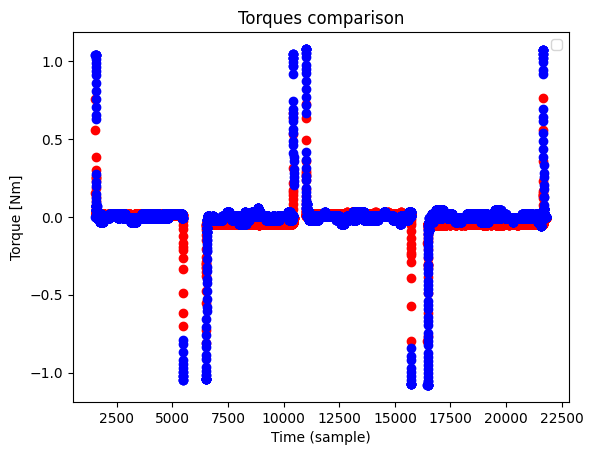

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


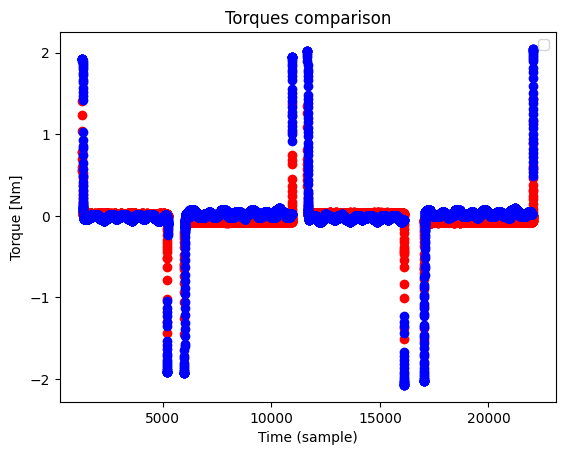

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


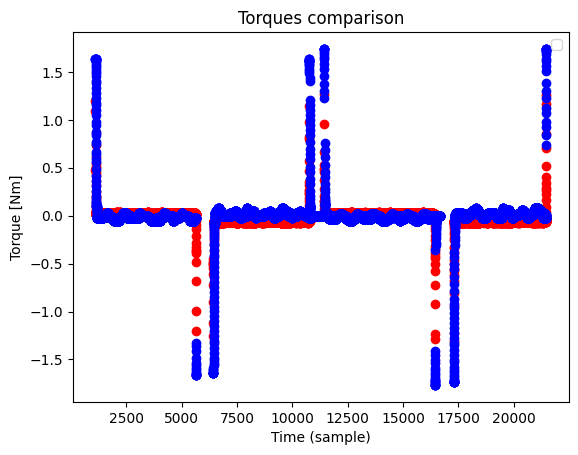

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


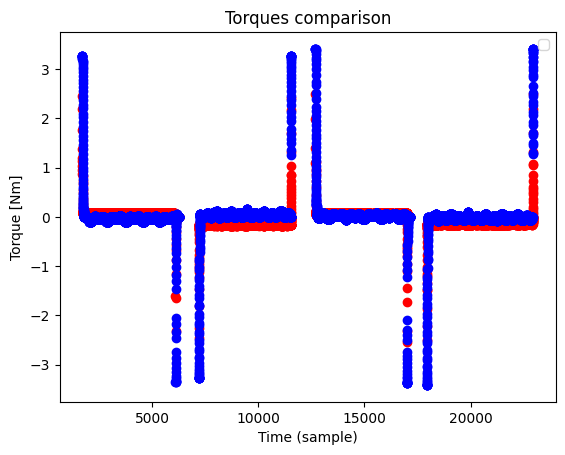

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


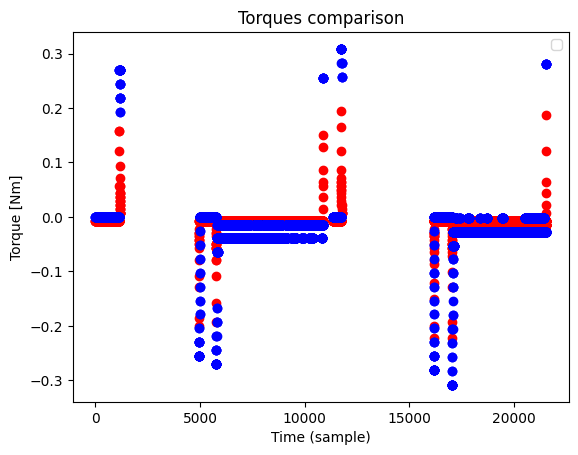

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


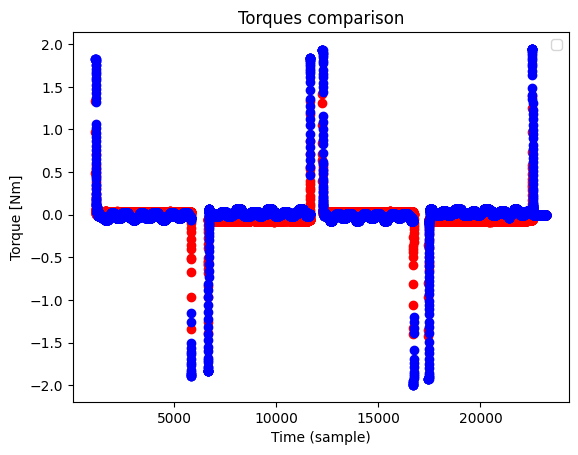

In [17]:
def plot_torques(df, file_name):
    plt.figure(figsize=(10, 6))
    plt.plot(df['tau_f'], label='tau_f')
    # plt.plot(df['tau_I'], label='tau_I')
    # plt.plot(df['tau_U'], label='tau_U')
    # plt.plot(df['tau_o'], label='tau_o')
    # plt.plot(df['tau_datasheet'], label='tau_datasheet')
    plt.plot(df['tau_em'], label='tau_em')
    plt.xlabel('Time (sample)')
    plt.ylabel('Torque [Nm]')
    plt.title(f'Torques {file_name}')
    plt.legend()
    plt.show()


plt.figure(figsize=(10, 6))
for df in processed_dataframes:
    df = df[df['DXL_Current'] != 0]
    # plt.scatter(df.index, df['tau_U'] - df['tau_I'])
    # plt.axhline((df['tau_U'] - df['tau_I']).mean(), label = (df['tau_U'] - df['tau_I']).mean())
    plt.scatter(df.index, df['tau_I'], color='r')
    plt.scatter(df.index, df['tau_U'], color='b')

    plt.xlabel('Time (sample)')
    plt.ylabel('Torque [Nm]')
    plt.title(f'Torques comparison')
    plt.legend()
    plt.show()